w sparse W block p = 1000


gFM with diag-zero
stop initialzation
w sparse W block p = 1000
gFM with diag-zero
stop initialzation
w sparse W block p = 1000
gFM with diag-zero
stop initialzation
w sparse W block p = 1000
gFM with diag-zero
stop initialzation
w sparse W block p = 1000
gFM with diag-zero
stop initialzation
w sparse W block p = 100


/Volumes/TONY/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


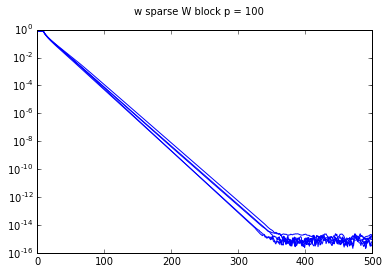

gFM with diag-zero
stop initialzation
w sparse W block p = 100
gFM with diag-zero
stop initialzation
w sparse W block p = 100
gFM with diag-zero
stop initialzation
w sparse W block p = 100
gFM with diag-zero
stop initialzation
w sparse W block p = 100
gFM with diag-zero
stop initialzation
w sparse W block p = 10


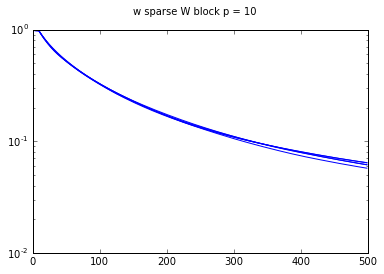

gFM with diag-zero
stop initialzation


ValueError: x and y must have same first dimension

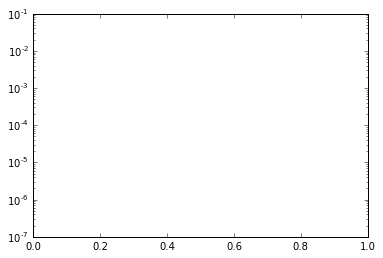

In [9]:
%matplotlib inline

import glob, os
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
# import gFM

os.chdir("../simulated_data/")

numtrain = 400
iterations = 500
rank_k = 2
max_init_iter = 10


def get_data(file):
    data = sio.loadmat(file)['data'][0]
    x, y, w0, w, W = data[0], data[1].reshape(-1), data[2], data[3], data[4]
    xtrain, ytrain, xtest, ytest = x[:numtrain,:], y[:numtrain], x[numtrain:,:], y[numtrain:]
    
    return xtrain, ytrain, xtest, ytest, w0, w, W


plots = set()
title = ""


for i, file in enumerate(glob.glob("*.mat")):
    temp = file.split('.')[0].replace('_', ' ').split(' p')
    p = temp[1].split()[0]
    title_new = temp[0] + ' p = ' + p
    
    print title_new
    
    if int(p) == 10:
        iterations = 100
        
    if title_new not in plots:
        plots.add(title_new)
        title = title_new
        if title != "":
            plt.suptitle(title)
            plt.savefig('../results/gFM/'+title+'.png')
            plt.show()
            plt.close()
        

    the_estimator = BatchRegression(rank_k=rank_k, max_init_iter=max_init_iter, learning_rate=0.01, init_tol=1e-4, tol=0, diag_zero=True)

    xtrain, ytrain, xtest, ytest, w0, w, W = get_data(file)
    ytruetrain = w0 + np.dot(xtrain, w) + np.expand_dims(np.diagonal(xtrain.dot(W).dot(xtrain.T)),axis=1)
    ytruetest = w0 + np.dot(xtest, w) + np.expand_dims(np.diagonal(xtest.dot(W).dot(xtest.T)),axis=1)
    
#     y = (X.dot(w_true) + gFM.A_diag0(U_true, U_true, X.T)-0.5).flatten()
    
    trainset_error_record, testset_error_record = [], []
    for i in xrange(iterations):
        the_estimator.fit(xtrain, ytrain, n_more_iter=1)
        y_hat_grad_train = the_estimator.predict(xtrain)
        y_hat_grad_test = the_estimator.predict(xtest)

        trainerror = sklearn.metrics.mean_absolute_error(ytrain, y_hat_grad_train) / sklearn.metrics.mean_absolute_error(ytrain, numpy.zeros((len(ytrain),)))
#         testerror = sklearn.metrics.mean_absolute_error(ytest, y_hat_grad_test) / sklearn.metrics.mean_absolute_error(ytest, numpy.zeros((len(ytest),)))
        trainset_error_record.append(trainerror)
#         testset_error_record.append(testerror)
    
    
    plt.semilogy(range(500), trainset_error_record, '-b')
    plt.legend()
#     plt.show()

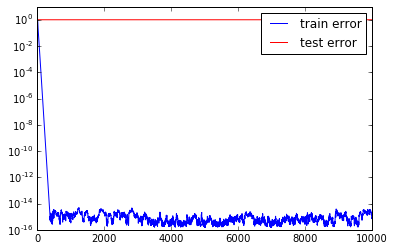

In [48]:
plt.semilogy(range(10000), trainset_error_record, '-b', label='train error')
plt.semilogy(range(10000), testset_error_record, '-r', label='test error')
plt.legend()
plt.show()

In [63]:
plots

{'w sparse W block p = 1000'}

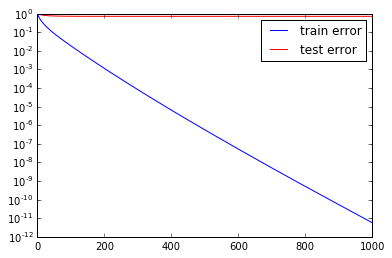

In [25]:
plt.semilogy(range(1000), trainset_error_record, '-b', label='train error')
plt.semilogy(range(1000), testset_error_record, '-r', label='test error')
plt.legend()
plt.show()

In [14]:
xtest,xtrain,ytrain,ytest = ml100k['xtest'], ml100k['xtrain'], ml100k['ytrain'].reshape(-1), ml100k['ytest'].reshape(-1)

In [15]:
import gFM
rank_k = 10
max_init_iter = 10

trainset_error_record, testset_error_record = [], []
the_estimator = gFM.BatchRegression(rank_k=rank_k, max_init_iter=max_init_iter, learning_rate=0.001, init_tol=1e-4, tol=0, diag_zero=False)
for i in xrange(100):
    the_estimator.fit(xtrain, ytrain, n_more_iter=1)
    y_hat_grad_train = the_estimator.predict(xtrain)
    y_hat_grad_test = the_estimator.predict(xtest)

    trainerror = sklearn.metrics.mean_absolute_error(ytrain, y_hat_grad_train) / sklearn.metrics.mean_absolute_error(ytrain, numpy.zeros((len(ytrain),)))
    testerror = sklearn.metrics.mean_absolute_error(ytest, y_hat_grad_test) / sklearn.metrics.mean_absolute_error(ytest, numpy.zeros((len(ytest),)))
    trainset_error_record.append(trainerror)
    testset_error_record.append(testerror)
    
    print trainerror
    print testerror

gFM using solver state-of-the-art
warning! small singular value when computing Z and G! sv = 0.000000
warning! small singular value when computing Z and G! sv = 0.000000
warning! small singular value when computing Z and G! sv = 0.000000
warning! small singular value when computing Z and G! sv = 0.000000
warning! small singular value when computing Z and G! sv = 0.000000
warning! small singular value when computing Z and G! sv = 0.000000
warning! small singular value when computing Z and G! sv = 0.000000
warning! small singular value when computing Z and G! sv = 0.000000
warning! small singular value when computing Z and G! sv = 0.000000
warning! small singular value when computing Z and G! sv = 0.000000
warning! small singular value when computing Z and G! sv = 0.000000
warning! small singular value when computing Z and G! sv = 0.000000
warning! small singular value when computing Z and G! sv = 0.000000
warning! small singular value when computing Z and G! sv = 0.000000
warning! small

KeyboardInterrupt: 

In [18]:
testset_error_record

[787636615898057.5,
 72165054336750.219,
 2618266295671.9951,
 68895915266.728546,
 1644541400.6818423,
 37330964.704886131,
 813125.43643453508,
 17080.741178291955,
 351.85419000292882,
 10.012867814393902,
 106.43351353991959,
 10961.728874186771,
 1264921.2294634404,
 151467184.4124535,
 18456132291.029129,
 2270055713935.1318]

In [679]:
the_estimator = gFM.BatchRegression(rank_k=rank_k, max_init_iter=max_init_iter, learning_rate=0.001, init_tol=1e-4, tol=0, diag_zero=False)

the_estimator.fit(xtrain, ytrain, n_more_iter=100)
y_hat_grad_train = the_estimator.predict(xtrain)    
y_hat_grad_test = the_estimator.predict(xtest)

trainerror = sklearn.metrics.mean_absolute_error(ytrain, y_hat_grad_train) / sklearn.metrics.mean_absolute_error(ytrain, numpy.zeros((len(ytrain),)))
trainerror = sklearn.metrics.mean_absolute_error(ytest, y_hat_grad_test) / sklearn.metrics.mean_absolute_error(ytest, numpy.zeros((len(ytest),)))

print trainerror
print testerror

0.960481735093
0.944036581342


In [7]:
"""
The gFM toolbox provides efficient solvers for the Generalized Factorization Machine (gFM) that can handle Tera-byte datasets.

There are two solvers provided:
1) gFM_BatchSolver implements the batch updating where the whole dataset can be loaded into memory.
2) gFM_MiniBatchSolver implements the mini-batch version of gFM_BatchSolver where we can load dataset in a mini-batch style. (To be implemented)

For installation and usage information, please refer to README.txt and examples.

@author: Ming Lin
@contact: linmin@umich.edu
"""
import sklearn.decomposition
# from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.base import BaseEstimator, RegressorMixin
import numpy


class BatchRegression(BaseEstimator, RegressorMixin):
    """
    The batch solver for gFM when the whole dataset can be loaded in memory.
    """
    def __init__(self, rank_k=None, max_iter=None, tol=1e-6, max_init_iter=None, init_tol=None,
                 lambda_M=numpy.Inf, lambda_w=numpy.Inf, learning_rate=1.0,solver_algorithm='state-of-the-art', using_cache=True,
                 learn_bias_term=True,learn_w=True, diag_zero=True):
        """
        Initialize a gFM_BatchSolver instance.
        :param rank_k: The rank of the target second order matrix in gFM ($M^*$). Should be of type int.
        :param max_iter: The number of iterations for training.
        :param tol: the error tolerance in training. Will stop if the desired accuracy is achieved
        :param max_init_iter: The number of iterations in initialization step.
        :param init_tol: the error tolerance in the initialization step. Will stop the initialization iteration if the desired accuracy is achieved.
        :param lambda_M: The Frobenius norm constraint for M
        :param lambda_w: The $\ell_2$-norm constraint for w
        """
        learning_rate = float(learning_rate)
        self.rank_k = rank_k
        self.lambda_M = lambda_M
        self.lambda_w = lambda_w
        self.max_iter = max_iter
        if self.max_iter is None: self.max_iter = int(100/learning_rate)
        self.max_init_iter = max_init_iter
        if self.max_init_iter is None: self.max_init_iter = int(100/learning_rate)
        self.learning_rate = learning_rate
        self.tol = tol
        self.init_tol = init_tol
        if self.init_tol is None: self.init_tol = self.tol
        self.solver_algorithm=solver_algorithm
        self.using_cache = using_cache
        self.learn_bias_term = learn_bias_term
        self.learn_w = learn_w
        self.diag_zero = diag_zero
        return

    def fit(self,X,y=None, sample_weight=None, n_more_iter=None, X_is_zscore_normalized = False):
        # type: (numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray) -> object
        """
        Train gFM with data X and label y.
        :param X: Feature matrix, $n \times d$.
        :param y: Label vector, shape=(n,)
        :param sample_weight: optional, weight for each samples, shape=(n,)
        :param n_more_iter: optional, number of iterations in this fit() call
        :param X_is_zscore_normalized: optional, if X has been z-score normalized, that is, each feature is zero-mean and unit variance, set this to True to save the computation for normalization in the fit() function.
        :return: self
        """
        if self.diag_zero:
            return self.fit_diag_zero(X,y, sample_weight, n_more_iter, X_is_zscore_normalized)
        else:
            return self.fit_diag_not_zero(X, y, sample_weight, n_more_iter, X_is_zscore_normalized)
    pass # end def

    def fit_diag_zero(self,X,y=None, sample_weight=None, n_more_iter=None, X_is_zscore_normalized = False):
        # type: (numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray) -> object
        """
        Train gFM with data X and label y.
        :param X: Feature matrix, $n \times d$.
        :param y: Label vector, shape=(n,)
        :param sample_weight: optional, weight for each samples, shape=(n,)
        :param n_more_iter: optional, number of iterations in this fit() call
        :param X_is_zscore_normalized: optional, if X has been z-score normalized, that is, each feature is zero-mean and unit variance, set this to True to save the computation for normalization in the fit() function.
        :return: self
        """
        X = X.T
        y = y[:, numpy.newaxis]
        y = numpy.asarray(y, dtype=numpy.float)
        n = X.shape[1]


        if sample_weight is None:
            sample_weight = numpy.ones((n,))
            sample_weight = sample_weight/numpy.sum(sample_weight)
        sample_weight = sample_weight[:, numpy.newaxis]

        X_new = None

        if not hasattr(self,'is_init_stage_'):
            self.is_init_stage_ = True
            self.remaining_init_iter_steps_ = self.max_init_iter
            self.remaining_train_iter_steps_ = self.max_iter
            self.d = X.shape[0]
            X_times_sample_weight = n * X * sample_weight.T

            if not X_is_zscore_normalized:
                self.data_mean = X_times_sample_weight.mean(axis=1, keepdims=True)
                X_new = X - self.data_mean
            else:
                self.data_mean = numpy.zeros((X.shape[0],1))
                X_new = X
            X_weighted_std = numpy.sqrt(n * numpy.mean((X_new ** 2) * sample_weight.T, axis=1, keepdims=True))

            if not X_is_zscore_normalized:
                self.data_std = numpy.maximum(X_weighted_std, 1e-12)
                X_new /= self.data_std
            else:
                self.data_std = numpy.ones((X.shape[0],1))

            Xp2 = X_new ** 2
            Xp3 = Xp2 * X_new

            if self.using_cache:
                self.cached_Xp2_ = Xp2
            pass # end if self.using_cache

            print 'gFM with diag-zero'

            self.data_moment3 = numpy.mean(n * (Xp3) * sample_weight.T, axis=1, keepdims=True)
            self.data_moment4 = None


            U, _ = numpy.linalg.qr(numpy.random.randn(self.d, self.rank_k))
            self.U = U
            self.V = numpy.zeros(U.shape)
            self.w = numpy.zeros((self.d,1))
            self.b = 0
        # end if

        if X_is_zscore_normalized == False and X_new is None:
            X = (X - self.data_mean) / self.data_std
        if X_is_zscore_normalized == False and X_new is not None:
            X = X_new

        if self.remaining_train_iter_steps_ < 0: self.remaining_train_iter_steps_ = 0
        if self.remaining_init_iter_steps_ < 0: self.remaining_init_iter_steps_ = 0



        if self.is_init_stage_:
            if n_more_iter is None:
                the_num_iter = self.remaining_init_iter_steps_
            else:
                the_num_iter = n_more_iter
            ite_count = 0
            p0 = numpy.sum(y)
            p1 = X.dot(y)
            cache_1 = self.data_moment3*p1 + p0
            for t in xrange(the_num_iter):
                ite_count += 1
                U_new = (ApA_diag0(y,self.U,X) - cache_1*self.U)/(2*n)
                U_new,_ = numpy.linalg.qr(U_new)
                if numpy.max(numpy.abs(self.U-U_new)) < self.init_tol:
                    self.is_init_stage_ = False
                    self.U = U_new
                    print 'early stop in initialzation'
                    break
                # end if numpy.mean(numpy.abs(self.U-U_new)) < self.init_tol:
                self.U = U_new
            # end for ite_count in xrange(n_more_iter):
            self.remaining_init_iter_steps_ -= ite_count
            if not n_more_iter is None: n_more_iter -= ite_count

            # update V
            V_new = (ApA_diag0(y,self.U,X) - cache_1*self.U)/(2*n) * self.learning_rate
            if numpy.linalg.norm(V_new) > self.lambda_M: V_new = V_new / numpy.linalg.norm(V_new) * self.lambda_M
            self.V = V_new

            # update w and b
            w_new = p1 / n * self.learning_rate
            if numpy.linalg.norm(w_new) > self.lambda_w: w_new = w_new / numpy.linalg.norm(w_new) * self.lambda_w

            b_new = p0/n * self.learning_rate
            if self.learn_w:
                self.w = w_new
            if self.learn_bias_term:
                self.b = b_new



            if self.remaining_init_iter_steps_ <= 0:
                print 'stop initialzation'
                self.is_init_stage_ = False
            # end if self.remaining_init_iter_steps_ <= 0:

        # end if self.is_init_stage_

        if not self.is_init_stage_:
            if n_more_iter is None:
                the_num_iter = self.remaining_train_iter_steps_
            else:
                the_num_iter = n_more_iter

            U = self.U
            V = self.V
            w = self.w
            b = self.b

            for t in xrange(the_num_iter):
                self.remaining_train_iter_steps_ -= 1

                hat_y = A_diag0(U, V, X) + X.T.dot(w) + b
                dy = y - hat_y
                dy = n * dy * sample_weight
                p0 = numpy.sum(dy)
                p1 = X.dot(dy)
                cache_1 = self.data_moment3 * p1 + p0

                # update U
                U_new = (ApA_diag0(dy,U,X) - cache_1*U)/(2 * n) * self.learning_rate + \
                        U.dot(V.T.dot(U)) / 2 + V.dot(U.T.dot(U)) / 2
                # V_new = U_new
                U_new, _ = numpy.linalg.qr(U_new)

                # update V
                V_new = (ApA_diag0(dy,U_new,X) - cache_1*U_new) / (2 * n) * self.learning_rate + \
                        U.dot(V.T.dot(U_new)) / 2 + V.dot(U.T.dot(U_new)) / 2
                if numpy.linalg.norm(V_new) > self.lambda_M: V_new = V_new / numpy.linalg.norm(V_new) * self.lambda_M

                # update w and b
                hat_y = A_diag0(U_new, V_new, X) + X.T.dot(w) + b
                dy = y - hat_y
                dy = n * dy * sample_weight
                p0 = numpy.sum(dy)
                p1 = X.dot(dy)

                w_new = p1/n * self.learning_rate + w
                if numpy.linalg.norm(w_new) > self.lambda_w: w_new = w_new / numpy.linalg.norm(w_new) * self.lambda_w

                b_new = p0/n*self.learning_rate + b

                if numpy.max(numpy.abs(U-U_new))<self.tol and numpy.max(numpy.abs(V-V_new))<self.tol and numpy.max(numpy.abs(w-w_new))<self.tol and numpy.abs(b-b_new)<self.tol:
                    U = U_new
                    V = V_new
                    if self.learn_w:
                        w = w_new
                    if self.learn_bias_term:
                        b = b_new
                    print 'early stop'
                    break
                # end if ... < tol

                # update old with new variances
                U = U_new
                V = V_new
                if self.learn_w:
                    w = w_new
                if self.learn_bias_term:
                    b = b_new
            # end for t

            self.U = U
            self.V = V
            self.w = w
            self.b = b
        # end if not self.is_init_stage_:
        return self
    # end def

    def fit_diag_not_zero(self,X,y=None, sample_weight=None, n_more_iter=None, X_is_zscore_normalized = False):
        # type: (numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray) -> object
        """
        Train gFM with data X and label y.
        :param X: Feature matrix, $n \times d$.
        :param y: Label vector, shape=(n,)
        :param sample_weight: optional, weight for each samples, shape=(n,)
        :param n_more_iter: optional, number of iterations in this fit() call
        :param X_is_zscore_normalized: optional, if X has been z-score normalized, that is, each feature is zero-mean and unit variance, set this to True to save the computation for normalization in the fit() function.
        :return: self
        """
        X = X.T
        y = y[:, numpy.newaxis]
        y = numpy.asarray(y, dtype=numpy.float)
        n = X.shape[1]


        if sample_weight is None:
            sample_weight = numpy.ones((n,))
            sample_weight = sample_weight/numpy.sum(sample_weight)
        sample_weight = sample_weight[:, numpy.newaxis]

        X_new = None

        if not hasattr(self,'is_init_stage_'):
            self.is_init_stage_ = True
            self.remaining_init_iter_steps_ = self.max_init_iter
            self.remaining_train_iter_steps_ = self.max_iter
            self.d = X.shape[0]
            X_times_sample_weight = n * X * sample_weight.T

            if not X_is_zscore_normalized:
                self.data_mean = X_times_sample_weight.mean(axis=1, keepdims=True)
                X_new = X - self.data_mean
            else:
                self.data_mean = numpy.zeros((X.shape[0],1))
                X_new = X
            X_weighted_std = numpy.sqrt(n * numpy.mean((X_new ** 2) * sample_weight.T, axis=1, keepdims=True))

            if not X_is_zscore_normalized:
                self.data_std = numpy.maximum(X_weighted_std, 1e-12)
                X_new /= self.data_std
            else:
                self.data_std = numpy.ones((X.shape[0],1))

            Xp2 = X_new ** 2
            Xp3 = Xp2*X_new
            Xp4 = Xp3 * X_new
            if self.using_cache:
                self.cached_Xp2_ = Xp2
            # end if self.using_cache

            print 'gFM using solver %s' %(self.solver_algorithm)
            if self.solver_algorithm == 'NIPS2016':
                self.data_moment3 = numpy.zeros(self.data_mean.shape)
                self.data_moment4 = numpy.zeros(self.data_mean.shape) + 3
            else:
                self.data_moment3 = numpy.mean(n * Xp3 * sample_weight.T, axis=1, keepdims=True)
                self.data_moment4 = numpy.mean(n * Xp4 * sample_weight.T, axis=1, keepdims=True)
                # end if self.using_cache
            # end if self.solver_algorithm == 'NIPS2016':
            tmp_A = numpy.zeros((2, 2, self.d))
            tmp_A[0, 0, :] = 1
            tmp_A[0, 1, :] = self.data_moment3.ravel()
            # tmp_A[0, 2, :] = self.data_moment4.ravel()
            tmp_A[1, 0, :] = self.data_moment3.ravel()
            tmp_A[1, 1, :] = self.data_moment4.ravel() - 1
            # tmp_A[1, 2, :] = self.data_moment5.ravel() - self.data_moment3.ravel()

            tmp_b = numpy.zeros((2, 1, self.d))
            tmp_b[0, 0, :] = self.data_moment3.ravel()
            tmp_b[1, 0, :] = self.data_moment4.ravel() - 3

            tmp_bw = numpy.zeros((2, 1, self.d))
            tmp_bw[0, 0, :] = 1
            tmp_bw[1, 0, :] = 0

            self.Z = numpy.zeros((self.d, 2))
            self.G = numpy.zeros((self.d, 2))
            sv_record = numpy.zeros((self.d,))
            for i in xrange(self.d):
                tmpu_u, tmp_s, tmp_v = numpy.linalg.svd(tmp_A[:, :, i], full_matrices=False)
                sv_record[i] = tmp_s[1]
                if tmp_s[1] < 0.05:
                    print 'warning! small singular value when computing Z and G! sv = %f' % (tmp_s[1])
            sv_threshold = numpy.max(sv_record)*1e-3
            for i in xrange(self.d):
                pinv_tmpA = numpy.linalg.pinv(tmp_A[:, :, i], sv_threshold)
                self.G[i, :] = numpy.ravel(pinv_tmpA.dot(tmp_bw[:, :, i]))
                self.Z[i, :] = numpy.ravel(pinv_tmpA.dot(tmp_b[:, :, i]))

            U, _ = numpy.linalg.qr(numpy.random.randn(self.d, self.rank_k))
            self.U = U
            self.V = numpy.zeros(U.shape)
            self.w = numpy.zeros((self.d,1))
            self.b = 0
        # end if

        if X_is_zscore_normalized == False and X_new is None:
            X = (X - self.data_mean) / self.data_std
        if X_is_zscore_normalized == False and X_new is not None:
            X = X_new

        if self.remaining_train_iter_steps_ < 0: self.remaining_train_iter_steps_ = 0
        if self.remaining_init_iter_steps_ < 0: self.remaining_init_iter_steps_ = 0

        if self.using_cache:
            Xp2 = self.cached_Xp2_
        else:
            Xp2 = X**2

        p0 = numpy.sum(y)
        p1 = X.dot(y)
        p2 = Xp2.dot(y)

        if self.is_init_stage_:
            if n_more_iter is None:
                the_num_iter = self.remaining_init_iter_steps_
            else:
                the_num_iter = n_more_iter
            ite_count = 0
            for t in xrange(the_num_iter):
                ite_count += 1
                U_new = mathcal_M_(n * y * sample_weight, self.U, X,  self.Z,p0,p1,p2,) / (2 * n)
                U_new,_ = numpy.linalg.qr(U_new)
                if numpy.mean(numpy.abs(self.U-U_new)) < self.init_tol:
                    self.is_init_stage_ = False
                    self.U = U_new
                    print 'early stop in initialzation'
                    break
                # end if numpy.mean(numpy.abs(self.U-U_new)) < self.init_tol:
                self.U = U_new
            # end for ite_count in xrange(n_more_iter):
            self.remaining_init_iter_steps_ -= ite_count
            if not n_more_iter is None: n_more_iter -= ite_count

            # update V
            V = mathcal_M_(n * y * sample_weight, self.U, X, self.Z,p0,p1,p2) / (2 * n) * self.learning_rate
            if numpy.linalg.norm(V) > self.lambda_M: V = V / numpy.linalg.norm(V) * self.lambda_M
            self.V = V

            # update w and b
            w_new = mathcal_W_(self.G,p0,p1,p2) / n * self.learning_rate
            if numpy.linalg.norm(w_new) > self.lambda_w: w_new = w_new / numpy.linalg.norm(w_new) * self.lambda_w
            if self.learn_w:
                self.w = w_new
            if self.learn_bias_term:
                b = (numpy.mean(y) - numpy.sum(self.U*self.V))*self.learning_rate
                self.b = b



            if self.remaining_init_iter_steps_ <= 0:
                print 'stop initialzation'
                self.is_init_stage_ = False
            # end if self.remaining_init_iter_steps_ <= 0:

        # end if self.is_init_stage_

        if not self.is_init_stage_:
            if n_more_iter is None:
                the_num_iter = self.remaining_train_iter_steps_
            else:
                the_num_iter = n_more_iter

            U = self.U
            V = self.V
            w = self.w
            b = self.b

            for t in xrange(the_num_iter):
                self.remaining_train_iter_steps_ -= 1

                hat_y = A_(X, U, V) + X.T.dot(w) + b
                dy = y - hat_y
                dy = n * dy * sample_weight
                p0 = numpy.sum(dy)
                p1 = X.dot(dy)
                p2 = Xp2.dot(dy)

                # update U
                U_new = mathcal_M_(dy, U, X, self.Z, p0, p1, p2) / (2 * n) * self.learning_rate + \
                        U.dot(V.T.dot(U)) / 2 + V.dot(U.T.dot(U)) / 2
                # V_new = U_new
                U_new, _ = numpy.linalg.qr(U_new)

                # update V
                V_new = mathcal_M_(dy, U_new, X, self.G, p0, p1, p2) / (2 * n) * self.learning_rate + \
                        U.dot(V.T.dot(U_new)) / 2 + V.dot(U.T.dot(U_new)) / 2
                if numpy.linalg.norm(V_new) > self.lambda_M: V_new = V_new / numpy.linalg.norm(V_new) * self.lambda_M

                # update w and b
                hat_y = A_(X, U_new, V_new) + X.T.dot(w) + b
                dy = y - hat_y
                dy = n * dy * sample_weight
                p0 = numpy.sum(dy)
                p1 = X.dot(dy)
                p2 = Xp2.dot(dy)

                w_new = mathcal_W_(self.G,p0,p1,p2) / n * self.learning_rate + w
                if numpy.linalg.norm(w_new) > self.lambda_w: w_new = w_new / numpy.linalg.norm(w_new) * self.lambda_w

                b_new = numpy.mean(dy)*self.learning_rate + b

                if numpy.mean(numpy.abs(U-U_new))<self.tol and numpy.mean(numpy.abs(V-V_new))<self.tol and numpy.mean(numpy.abs(w-w_new))<self.tol and numpy.abs(b-b_new)<self.tol:
                    U = U_new
                    V = V_new
                    if self.learn_w:
                        w = w_new
                    if self.learn_bias_term:
                        b = b_new
                    print 'early stop'
                    break
                # end if ... < tol

                # update old with new variances
                U = U_new
                V = V_new
                if self.learn_w:
                    w = w_new
                if self.learn_bias_term:
                    b = b_new
            # end for t

            self.U = U
            self.V = V
            self.w = w
            self.b = b
        # end if not self.is_init_stage_:
        return self
    # end def

    def decision_function(self,X):
        # type: (numpy.ndarray) -> numpy.ndarray
        """
        Compute the decision values $s$ of X such that $\sign{s}$ is the predicted labels of X
        :param X: $n \times d$.
        :return: The decision values of X, $n \times 1$ vector
        """
        if not self.diag_zero:
            X = X.T
            X = (X - self.data_mean) / self.data_std
            the_decision_values = A_(X,self.U,self.V) + X.T.dot(self.w) + self.b
        else:
            X = X.T
            X = (X - self.data_mean) / self.data_std
            the_decision_values = A_diag0(self.U,self.V,X) + X.T.dot(self.w) + self.b
        pass # end if
        return the_decision_values.flatten()

    def predict(self,X):
        # type: (numpy.ndarray) -> numpy.ndarray
        """
        Predict the labels of X
        :param X: $n \times d$ feature matrix.
        :return: The predicted labels
        """
        return self.decision_function(X)
pass # end class

def mathcal_W_(G,p0,p1,p2):
    # type: (numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray) -> numpy.ndarray
    """
    Return $\mathcal{W}(y)*n given the constant parameters. X should be zero-mean unit-variance
    """
    # p0 = numpy.sum(y)
    # p1 = X.dot(y)
    # p2 = (X**2).dot(y)
    # p3 = (X**3).dot(y)

    # return G[:,0,numpy.newaxis]*p1 + G[:,1,numpy.newaxis]*(p2-p0) + G[:,2,numpy.newaxis]*( p3 - data_moment3*p0 )
    return G[:, 0, numpy.newaxis] * p1 + G[:, 1, numpy.newaxis] * (p2 - p0)

# end def

def mathcal_M_(y,U,X,Z,p0,p1,p2):
    # type: (numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray) -> numpy.ndarray
    """
    Return $\mathcal{M}(y)U*2n, given the constant parameters. X should be zero-mean unit-variance
    """

    # p0 = numpy.sum(y)
    # p1 = X.dot(y)
    # p2 = (X**2).dot(y)
    # p3 = (X**3).dot(y)

    term1 = (X*y.T).dot(X.T.dot(U))
    # term2 = p0+ Z[:,0,numpy.newaxis]*p1 + Z[:,1,numpy.newaxis]*(p2-p0) + Z[:,2,numpy.newaxis]*( p3 - data_moment3*p0)
    term2 = p0+ Z[:, 0, numpy.newaxis] * p1 + Z[:, 1, numpy.newaxis] * (p2 - p0)
    return term1 - term2*U
# end def

def A_(X,U,V):
    # type: (numpy.ndarray, numpy.ndarray, numpy.ndarray) -> numpy.ndarray
    """
    The sensing operator A in gFM. X is the data matrix; UV'=M as in gFM. The X should be zero-mean and unit-variance.
    \mathcal{A}(M) = { x_i' (M +M') x_i/2}_{i=1}^n where M=UV'
    :param X: a $d \times n$ feature matrix
    :param U: $d \times k$ matrix
    :param V: $d \times k$ matrix
    :return: z = A(UV')
    """

    z = numpy.sum( X.T.dot(U) * X.T.dot(V), axis=1, keepdims=True)
    return z

# end def

def ApW_(X,p,W):
    # type: (numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray) -> numpy.ndarray
    """
    Compute z=A'(p)W, X should be zero-mean and unit-variance
    : param X: feature matrix, $d \times n$
    :param p: $n \times 1$ vector
    :param W: $d \times k$ matrix
    :param mean: mean vector of features, $d \times 1$ vector.
    :param sigma: std of features, $d \times 1$ vector
    :return: $d \times k$ matrix
    """


    z = X.dot(p*X.T.dot(W))
    return z
# end def

def ApA_diag0(y, U, X):
    # type: (numpy.ndarray, numpy.ndarray, numpy.ndarray,) -> numpy.ndarray
    """
    return A'A(y)*U= (\sum_i x_i y_i x_i' )*U
    :param y:
    :param U:
    :param X:
    :return:
    """
    return (X*y.T).dot(X.T.dot(U))
pass # end def

def A_diag0(U, V, X):
    # type: (numpy.ndarray, numpy.ndarray, numpy.ndarray,) -> numpy.ndarray
    """
    return A(UV' - diag(UV')) = (X'U * X'V) 1 - (X*(((U*V)1)*X))1
    :param U:
    :param V:
    :param X:
    :return:
    """
    z = numpy.sum(X.T.dot(U) * X.T.dot(V), axis=1, keepdims=True)
    z_diag = numpy.sum(X*(numpy.sum(U*V,axis=1,keepdims=True)*X), axis=0, keepdims=True).T
    return z-z_diag
pass # end def